1. Load Titanic Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Check for Missing Values

In [2]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3. Fill Missing Age with Median

In [3]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\tashf\AppData\Local\Temp\ipykernel_9392\1163817291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


4. Encode 'Sex' Column

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Sex' from text to numeric: male = 1, female = 0
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])


5. Select Features and Target

In [5]:
# Define features and target
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]        # Features (input)
y = df['Survived']      # Target (label)


6. Check the Data

In [6]:
X.head()


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


7. Split the Data

 splits dataset into 80% for training and 20% for testing.

In [7]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


8. Train a Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


9. Make Predictions on the Test Set

In [9]:
# Predict survival on the test set
y_pred = model.predict(X_test)


10. Evaluate the Model

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[89 16]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



11. Visualize Feature Importance

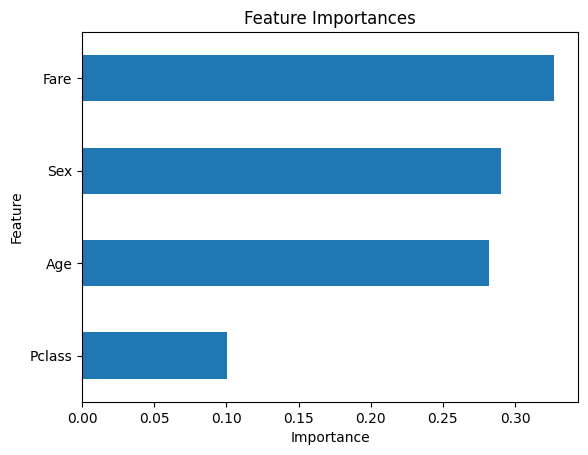

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a series and plot
pd.Series(importances, index=feature_names).sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


12. Logistic Regression for comparison 

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.8044692737430168


Save Model for Future Use

In [13]:
import joblib

# Save model
joblib.dump(model, "titanic_model.pkl")


['titanic_model.pkl']